In [1]:
import pandas as pd
import numpy as np
#feature and dimension expand, why?
#what if we only use original features?
#Assume we have three orignal features: amt, paymtd, paytype
#dictionary for each feature is as following:
##Amt:0-9
##Paymtd:0-9
##Paytype:0-9
##RecorPay:0-9
#suppose we have three class of txn as following:
##txn_class1:Amt always in bin 0
##txn_class1:Amt always in bin 5
##txn_class1:Amt always in bin 9
###We want to use our models to find such three kinds of txn_class
def txn_class1():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,0.0,
                                0.0,0.0,0.1,0.1,0.8])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]


def txn_class2():
    amt=np.random.choice(10,1,p=[0.8,0.1,0.1,0.0,0.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

def txn_class3():
    amt=np.random.choice(10,1,p=[0.0,0.0,0.0,0.0,1.0,
                                0.0,0.0,0.0,0.0,0.0])[0]
    paymed=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    paytype=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    RecorPay=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    bene=np.random.choice(10,1,p=[0.1,0.1,0.1,0.1,0.1,
                                0.1,0.1,0.1,0.1,0.1])[0]
    return [amt,paymed,paytype,RecorPay,bene]

In [14]:
data=[txn_class1() for i in range(3000)]
data.extend([txn_class2() for i in range(3000)])
data.extend([txn_class3() for i in range(3000)])

In [15]:
######SVD#######
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=4,random_state=0)
svd.fit(data)
print(svd.singular_values_) 
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum()) 

[989.70476815 319.18057052 276.30361472 273.84979965]
[0.20207503 0.25136043 0.1887739  0.18544459]
0.8276539512266139


In [16]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data)
print(pca.singular_values_)  
print(pca.explained_variance_ratio_)  

[330.31267737 277.98435778 273.92661294 271.11953695 263.58182235]
[0.26979922 0.19108691 0.18554902 0.18176566 0.17179919]


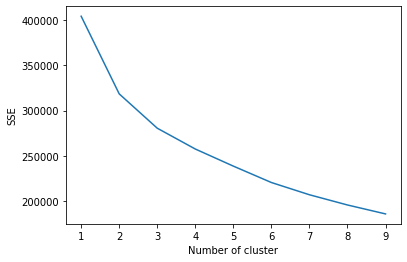

In [17]:
####K-means for clustering#############
####Elbow method for select best K#####
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    #data1["pred_class"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [32]:
###########################
###Feature-Augmentation####
###########################

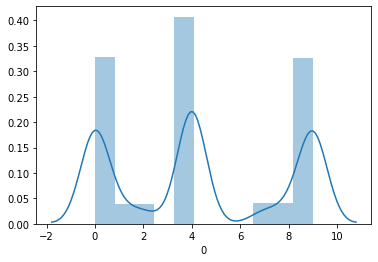

In [22]:
import seaborn as sns
sns.distplot(data_df[0])

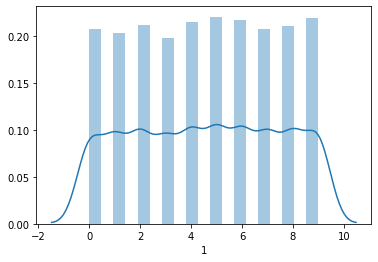

In [23]:
sns.distplot(data_df[1])

In [27]:
print(np.var(data_df[0]));print(np.var(data_df[1]))
print(np.cov(data_df[0],data_df[1]))

12.11228661728395
8.231918222222221
[[12.11363258 -0.12530903]
 [-0.12530903  8.23283298]]


In [34]:
data_df=pd.DataFrame(data)
data_feat0_dummy=pd.get_dummies(data_df[0]);data_feat0_dummy.head(3)

,0,1,2,4,7,8,9
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0


In [42]:
######SVD#######
from sklearn.decomposition import TruncatedSVD
svd=TruncatedSVD(n_components=6,random_state=0)
svd.fit(data_feat0_dummy)
print(svd.singular_values_) 
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum()) 

[54.77225575 49.1934955  48.98979486 17.34935157 17.29161647 17.05872211]
[0.29982312 0.26523686 0.26384435 0.04361425 0.04333442 0.04221375]
0.9580667544859738


D:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return_n_iter=True)
D:\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return_n_iter=True)


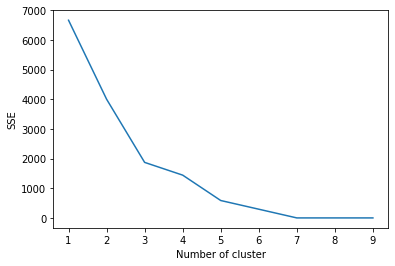

In [36]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_feat0_dummy)
    #data1["pred_class"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [47]:
data_dummy=pd.get_dummies(data=data_df,columns=[0,1,2,3,4])

In [49]:
svd=TruncatedSVD(n_components=20,random_state=0)
svd.fit(data_dummy)
print(svd.singular_values_) 
print(svd.explained_variance_ratio_)
print(svd.explained_variance_ratio_.sum()) 

[77.92753214 52.50403715 49.14897233 31.92364486 31.49113044 31.43891717
 31.16636997 31.10585264 30.96290663 30.7564228  30.7429077  30.66270473
 30.45769732 30.43723856 30.3085921  30.17414853 30.10631027 29.91976125
 29.88234521 29.80112305]
[0.00437473 0.07001936 0.06183215 0.0260849  0.02538388 0.02530035
 0.02486359 0.02476683 0.02453919 0.02421309 0.02419254 0.02406648
 0.02374412 0.02371369 0.02351379 0.02330567 0.0232005  0.0229131
 0.02285676 0.02273279]
0.5456175006663627


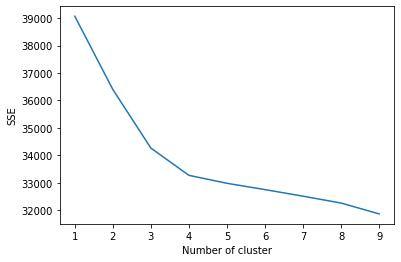

In [50]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data_dummy)
    #data1["pred_class"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

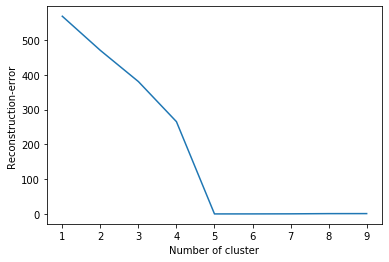

In [56]:
from sklearn.decomposition import NMF
re = {}
for k in range(1, 10):
    nmf = NMF(n_components=k, max_iter=1000).fit(data)
    re[k] = nmf.reconstruction_err_  # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(re.keys()), list(re.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Reconstruction-error")
plt.show()

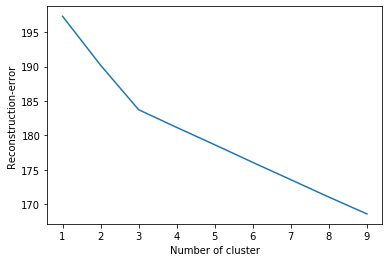

In [60]:
from sklearn.decomposition import NMF
re = {}
for k in range(1, 10):
    nmf = NMF(n_components=k, max_iter=1000).fit(data_dummy)
    re[k] = nmf.reconstruction_err_  # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(re.keys()), list(re.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Reconstruction-error")
plt.show()